In [1]:
import pandas as pd 
import numpy as np 
from tensorflow.keras import Sequential #This is for stacking the layers 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization, Activation, LeakyReLU
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import kernel_metrics
from tensorflow.keras.callbacks import ModelCheckpoint 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
import seaborn as sns
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

### **Importing and loading the CIFAR dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# load the X_train set
x_train.shape 

(50000, 32, 32, 3)

Deduction 
Here, the dimension is of 4 with 50000 images in the train set; image size of 32 x 32pixels and 3nos channels (RGB ) 

In [4]:
# The y_train set has 5000images and in 1D array 
y_train.shape 

(50000, 1)

In [5]:
y_train[0:2]

array([[6],
       [9]], dtype=uint8)

We can see above  that the y_train isnt in 1D array but 2D array hence need to rescale 


Rescaling can be done using y_train.reshape(-1,) Since the 5000 is meant to be the same; so -1 makes it same and we leave the other.   

Using to_categorical
If dot rescaling method used then the loss function during compiling will e sparse categorical cross entropy but if to_categorical which turns to one hot encoding, then categorical cross entropy will be used as loss function. 
If rescaled, it will return as a single array containing the image class 

In [6]:
# iamges correspond to this class  
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"] 


In [45]:
# rescale and can see that it returned the actual class in the first five position of the train set 
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
# If to categorical
# y_train = to_categorical(y_train) - This will return array in 2D array and in probaility for each array. Each array representing probabilities  


In [9]:
len (x_train[0]) 

32

In [10]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

Text(0.5, 0, 'frog')

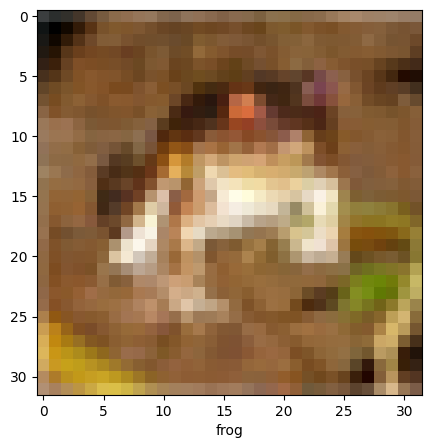

In [11]:
# View image 
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"] 
plt.figure(figsize=(8,5))
plt.imshow(x_train[0])
plt.xlabel(classes[y_train[0]]) # y_train[0] will return a value and this value corresponds to the index. Say in index 0 is the frog which corresponds to class - 5


In [12]:
def plot_image (x, y, index ): 
  plt.figure(figsize=(8,5))
  plt.imshow(x_train[index])
  plt.xlabel(classes[y_train[index]])

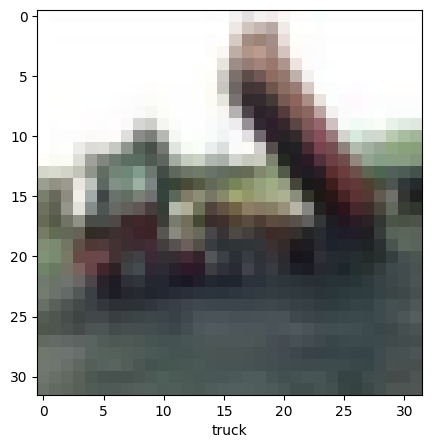

In [13]:
plot_image(x_train, y_train, 2)

In [14]:
# Normalize the image size with max image size 225 
x_train = x_train/255
x_test = x_test/255 

## BUILD MODEL WITH CNN 

In [50]:
model = Sequential()

# Convolutional Neural Network 
model.add(Conv2D(64, (3,3), activation = "relu", input_shape = (32,32,3) )) # filter no - 64, kernel or filter_size = (3 x 3)
model.add(Conv2D(32, (3,3), activation = "relu" )) # With the filters feature are being mapped; returnin a convolved features 
model.add(MaxPooling2D (2, 2)) # Extracts dominant features from the convolved feature by the CNN; reduces the spatial size of the convolved feature. End of 1st conv block 

model.add(Conv2D(32, (3,3), activation = "relu" )) 
model.add(MaxPooling2D (2, 2)) # 2nd conv block  

# Dense 
model.add(Flatten() ) # here the layers are flatten before getting to the dense or fully connected layer  
model.add(Dense(64, activation= 'relu') ) # dense layer  
model.add(Dense(10, activation = 'softmax')) # Output layer 
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"] )


In [26]:
es = EarlyStopping( monitor = "val_loss", mode = "min", patience = 3, verbose = 2)
ck = ModelCheckpoint("cnn_model.hdf5", monitor = "val_loss", save_best_only = True, save_weight_only =True)

In [27]:
result = model.fit ( x_train, y_train, batch_size= 32, epochs = 50, validation_split = 0.2, verbose =2, callbacks = [es, ck], shuffle = True)

Epoch 1/50
1250/1250 - 10s - loss: 1.4899 - accuracy: 0.4642 - val_loss: 1.2532 - val_accuracy: 0.5575 - 10s/epoch - 8ms/step
Epoch 2/50
1250/1250 - 5s - loss: 1.1099 - accuracy: 0.6101 - val_loss: 1.0696 - val_accuracy: 0.6306 - 5s/epoch - 4ms/step
Epoch 3/50
1250/1250 - 7s - loss: 0.9667 - accuracy: 0.6631 - val_loss: 0.9755 - val_accuracy: 0.6529 - 7s/epoch - 5ms/step
Epoch 4/50
1250/1250 - 5s - loss: 0.8734 - accuracy: 0.6969 - val_loss: 0.9153 - val_accuracy: 0.6861 - 5s/epoch - 4ms/step
Epoch 5/50
1250/1250 - 6s - loss: 0.8054 - accuracy: 0.7173 - val_loss: 0.9208 - val_accuracy: 0.6881 - 6s/epoch - 5ms/step
Epoch 6/50
1250/1250 - 5s - loss: 0.7421 - accuracy: 0.7411 - val_loss: 0.8830 - val_accuracy: 0.6972 - 5s/epoch - 4ms/step
Epoch 7/50
1250/1250 - 6s - loss: 0.6958 - accuracy: 0.7561 - val_loss: 0.9323 - val_accuracy: 0.6815 - 6s/epoch - 5ms/step
Epoch 8/50
1250/1250 - 6s - loss: 0.6530 - accuracy: 0.7718 - val_loss: 0.8781 - val_accuracy: 0.7011 - 6s/epoch - 5ms/step
Epoch 

In [28]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.489864,0.464250,1.253152,0.5575
1,1.109936,0.610100,1.069578,0.6306
2,0.966714,0.663100,0.975530,0.6529
3,0.873420,0.696900,0.915265,0.6861
4,0.805414,0.717275,0.920753,0.6881
5,0.742107,0.741075,0.883008,0.6972
6,0.695816,0.756125,0.932346,0.6815
7,0.653027,0.771800,0.878063,0.7011
8,0.616509,0.784875,0.890418,0.7075
9,0.575003,0.799575,0.898273,0.7059


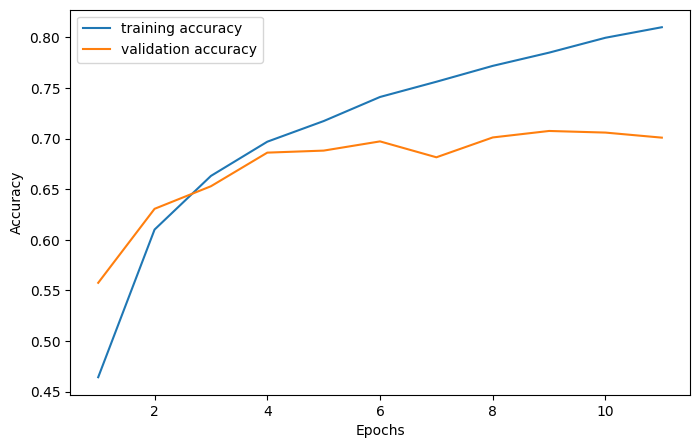

In [29]:
val_acc = result.history["val_accuracy"]
acc = result.history["accuracy"]
epochs = range(1, len(acc) + 1) 
# epochs = range (1,10)
plt.figure(figsize = (8,5))
plt.plot(epochs, acc, label = "training accuracy")
plt.plot(epochs, val_acc, label = "validation accuracy")
plt.legend( loc ="best") # this is to place the plot label at best position 
plt.xlabel ("Epochs")
plt.ylabel("Accuracy")
plt.show() 

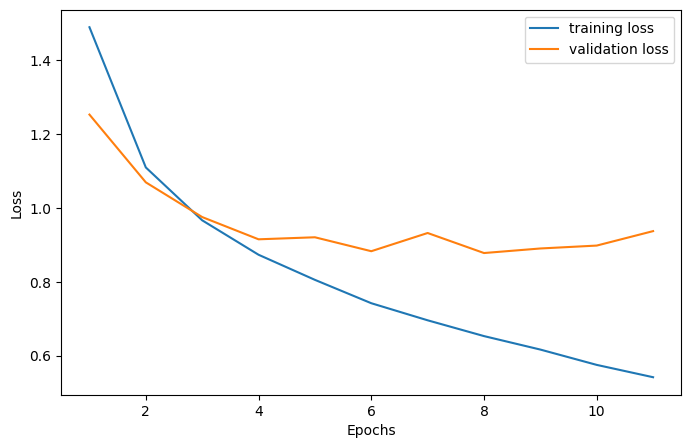

In [30]:
val_acc = result.history["val_loss"]
acc = result.history["loss"]
epochs = range(1, len(acc) + 1) 
# epochs = range (1,10)
plt.figure(figsize = (8,5))
plt.plot(epochs, acc, label = "training loss")
plt.plot(epochs, val_acc, label = "validation loss")
plt.legend( loc ="best") # this is to place the plot label at best position 
plt.xlabel ("Epochs")
plt.ylabel("Loss")
plt.show() 

In [49]:
model.evaluate(x_test, y_test) # we can see perferformance of the y_test at 70% approximate 

313/313 [==============================] - 1s 3ms/step - loss: 0.9510 - accuracy: 0.6981


[0.9509931802749634, 0.6980999708175659]

In [35]:
y_pred = model.predict(x_test)
y_pred[:4] # y_pred will return result in probabilities; hence argmax will help capture the index with maximum probability whcih then is equal to the class index value 

313/313 [==============================] - 1s 3ms/step


array([[1.6558910e-04, 4.9646633e-06, 3.7119654e-04, 6.1621791e-01,
        8.1949995e-04, 3.8136289e-01, 4.0600338e-04, 4.4244269e-04,
        1.1881037e-04, 9.0698304e-05],
       [3.2506222e-03, 1.3510158e-02, 9.1448686e-07, 1.5902202e-06,
        3.8574640e-07, 3.8569542e-08, 2.3798302e-07, 1.7146161e-09,
        9.8298949e-01, 2.4656137e-04],
       [4.6549106e-01, 2.9503731e-02, 3.9530913e-03, 8.4883068e-03,
        6.6183046e-03, 6.3395174e-04, 2.2667021e-04, 4.2813872e-03,
        4.7892824e-01, 1.8753300e-03],
       [9.9206734e-01, 2.6208842e-03, 5.8708910e-04, 1.1894586e-05,
        6.8810268e-04, 9.5137821e-08, 1.0978533e-06, 5.2289711e-06,
        3.9601885e-03, 5.8033896e-05]], dtype=float32)

In [47]:
y_pred_class = [ np.argmax(element) for element in y_pred]
y_pred_class[4: 10]

[6, 6, 1, 6, 3, 0]

In [48]:
y_test[4:10] # Testing, we can see upon evaluation the prediction is close to actual  

array([6, 6, 1, 6, 3, 1], dtype=uint8)

Conclusion 

Its is clear that that the CNN model outperfromed the ANN with validation accuracy of 70% approximate and evaluation score of 70%. 

### GREAT JOB!!!